<a href="https://colab.research.google.com/github/JigyasaSharma-Tech/Jigyasa/blob/main/Green_Trail_Promotion_Data_Analysis_by_MasterCard_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJECTIVE:**
Your goal is to analyze GreenTrail Outdoors' promotion data and propose an optimized promotional strategy. This strategy should align with GreenTrail's sustainability ethos and aim to improve the effectiveness of their in-store promotions.

1)Pay close attention to the performance metrics of past promotions in various stores.

2)Look for trends, patterns, or anomalies in the data.

3)Consider what other data could enrich your analysis (e.g. customer demographics, regional economic data).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt
from scipy import stats

In [ ]:
data = pd.read_excel('/content/GreenTrail Store Data.xlsx')

In [ ]:
data.head()

,Store ID,Location,Store Size,Store Type,Promotion ID,Type of Promotion,Promotion Start Date,Promotion End Date,Weekly Sales During Promotion,Weekly Sales Before Promotion,Weekly Sales After Promotion,Average Daily Visits During Promotion,Average Daily Visits Before Promotion,Average Daily Visits After Promotion
0,1,New York,2000,Urban,101,Discount,2023-06-01,2023-06-14,50000,30000,35000,400,300,350
1,2,Los Angeles,1500,Suburban,102,Buy-One-Get-One,2023-05-15,2023-05-28,45000,35000,30000,450,400,375
2,3,Chicago,1800,Urban,103,Special Event,2023-07-01,2023-07-14,60000,40000,40000,500,350,450
3,4,Houston,1600,Suburban,104,Discount,2023-06-10,2023-06-24,48000,32000,33000,425,310,320
4,5,Phoenix,1700,Urban,105,Buy-One-Get-One,2023-04-20,2023-05-04,53000,34000,36000,475,350,370


In [ ]:
data.shape

(25, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Store ID                               25 non-null     int64         
 1   Location                               25 non-null     object        
 2   Store Size                             25 non-null     int64         
 3   Store Type                             25 non-null     object        
 4   Promotion ID                           25 non-null     int64         
 5   Type of Promotion                      25 non-null     object        
 6   Promotion Start Date                   25 non-null     datetime64[ns]
 7   Promotion End Date                     25 non-null     datetime64[ns]
 8   Weekly Sales During Promotion          25 non-null     int64         
 9   Weekly Sales Before Promotion          25 non-null     int64       

In [ ]:
data.isnull().sum()

,0
Store ID,0
Location,0
Store Size,0
Store Type,0
Promotion ID,0
Type of Promotion,0
Promotion Start Date,0
Promotion End Date,0
Weekly Sales During Promotion,0
Weekly Sales Before Promotion,0


# **Exploratory Data Analysis**
*A) Sales & Visits Before vs During vs After*

In [ ]:
sales_cols = ['Weekly Sales Before Promotion', 'Weekly Sales During Promotion', 'Weekly Sales After Promotion']
visit_cols = ['Average Daily Visits Before Promotion', 'Average Daily Visits During Promotion', 'Average Daily Visits After Promotion']

data_sales_melted = data.melt(id_vars=['Store ID', 'Location', 'Store Type'],
                          value_vars=sales_cols, var_name='Period', value_name='Sales')

data_visits_melted = data.melt(id_vars=['Store ID', 'Location', 'Store Type'],
                           value_vars=visit_cols, var_name='Period', value_name='Visits')

/tmp/ipython-input-39-2963566200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_sales_melted, x='Period', y='Sales', palette='Blues')


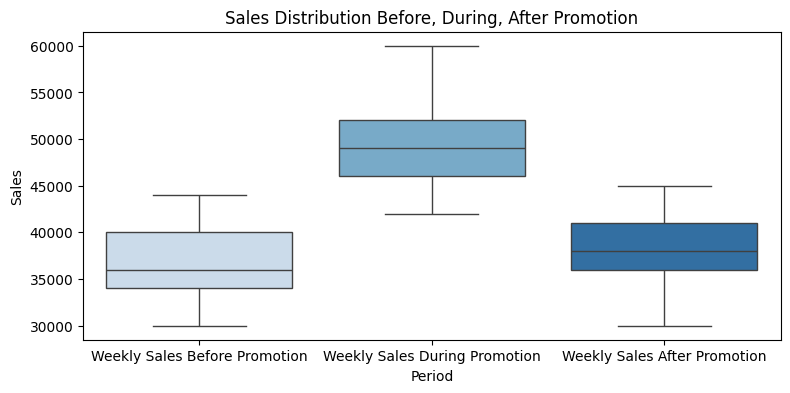

In [ ]:
# Sales Trend Visualization
plt.figure(figsize=(9, 4))
sns.boxplot(data=data_sales_melted, x='Period', y='Sales', palette='Blues')
plt.title('Sales Distribution Before, During, After Promotion')
plt.show()

/tmp/ipython-input-38-898008420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_visits_melted, x='Period', y='Visits', palette='Greens')


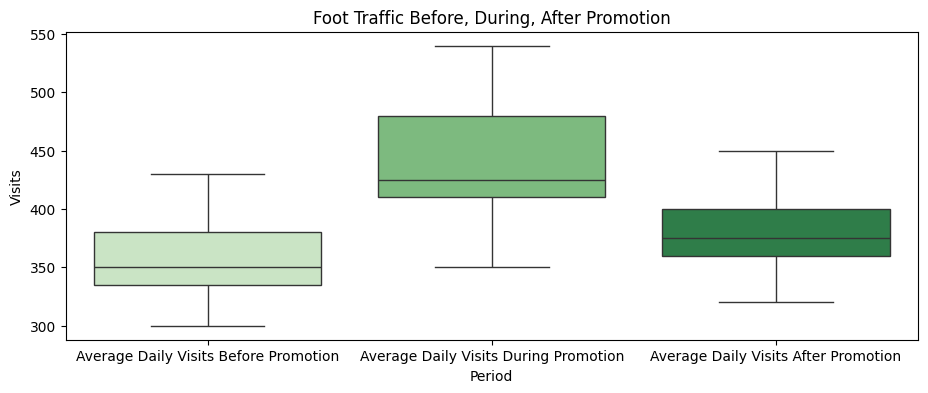

In [ ]:
# Visits Trend Visualization
plt.figure(figsize=(11, 4))
sns.boxplot(data=data_visits_melted, x='Period', y='Visits', palette='Greens')
plt.title('Foot Traffic Before, During, After Promotion')
plt.show()

B) *Promotion* Type Effectiveness

In [ ]:
# Sales Lift = During - Before
data['Sales Lift'] = data['Weekly Sales During Promotion'] - data['Weekly Sales Before Promotion']
data['Visit Lift'] = data['Average Daily Visits During Promotion'] - data['Average Daily Visits Before Promotion']
print(data[['Sales Lift', 'Visit Lift']])

    Sales Lift  Visit Lift
0        20000         100
1        10000          50
2        20000         150
3        16000         115
4        19000         125
5        18000         180
6         3000          10
7        13000         110
8        11000          55
9        19000         180
10        8000          40
11       13000         110
12        8000          60
13       14000         120
14       12000          80
15       14000         110
16        2000          10
17       12000          80
18       12000          60
19       14000         120
20       12000          80
21       11000         110
22       12000          60
23       11000          70
24       12000          60


/tmp/ipython-input-44-858611963.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Type of Promotion', y='Sales Lift', ax=axes[0], palette='coolwarm')
/tmp/ipython-input-44-858611963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Type of Promotion', y='Visit Lift', ax=axes[1], palette='viridis')


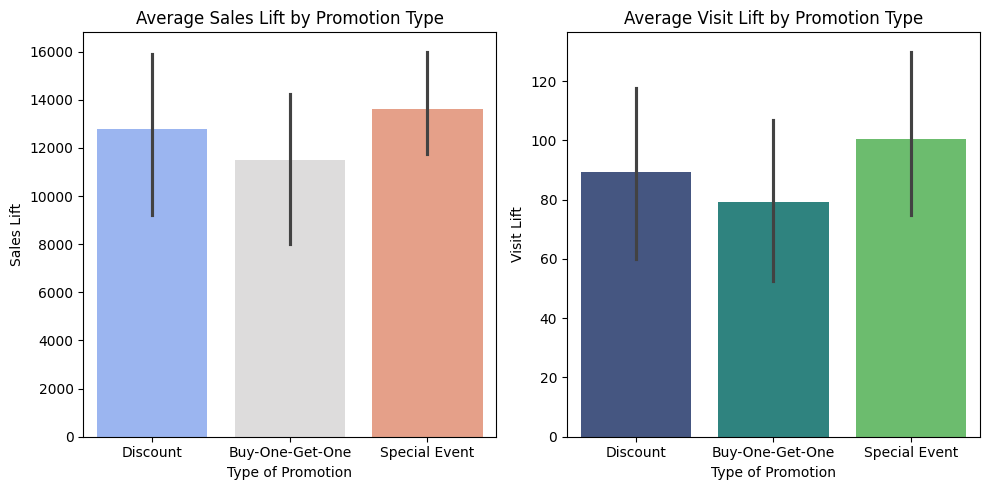

In [ ]:
# Barplot of Average Lift by Promotion Type
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(data=data, x='Type of Promotion', y='Sales Lift', ax=axes[0], palette='coolwarm')
axes[0].set_title('Average Sales Lift by Promotion Type')

sns.barplot(data=data, x='Type of Promotion', y='Visit Lift', ax=axes[1], palette='viridis')
axes[1].set_title('Average Visit Lift by Promotion Type')

plt.tight_layout()
plt.show()

In [ ]:
#Calculate Promotion Length by Location, Store Type, and Store Size

# Calculate Promotion Duration
data['Promotion Duration'] = (data['Promotion End Date'] - data['Promotion Start Date']).dt.days

# Group by Location, Store Type, and Store Size
grouped_duration = data.groupby(['Location', 'Store Type', 'Store Size'])['Promotion Duration'].mean().reset_index()

# Rename for clarity
grouped_duration.rename(columns={'Promotion Duration': 'Avg Promotion Duration (days)'}, inplace=True)

# Display the table
grouped_duration.sort_values(by='Avg Promotion Duration (days)', ascending=False)


,Location,Store Type,Store Size,Avg Promotion Duration (days)
0,Austin,Suburban,1600,14.0
1,Baltimore,Suburban,1500,14.0
2,Boston,Urban,1650,14.0
3,Charlotte,Suburban,1750,14.0
5,Columbus,Urban,1650,14.0
7,Denver,Urban,1600,14.0
6,Dallas,Suburban,1500,14.0
8,Detroit,Urban,1900,14.0
9,El Paso,Suburban,1300,14.0
23,San Diego,Urban,2000,14.0


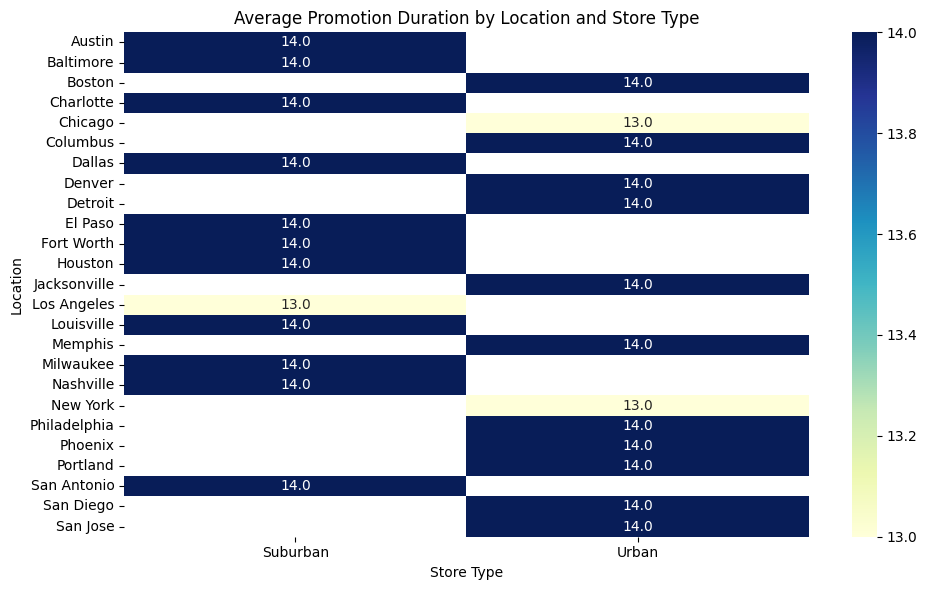

In [ ]:
# Pivot for heatmap (optional: simplify by aggregating Store Size into bins if needed)
pivot_duration = data.pivot_table(
    index='Location',
    columns='Store Type',
    values='Promotion Duration',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_duration, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Promotion Duration by Location and Store Type')
plt.ylabel('Location')
plt.xlabel('Store Type')
plt.tight_layout()
plt.show()